In [618]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

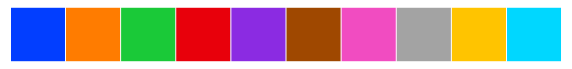

In [619]:
sns.set_theme(rc = {"figure.dpi": 96, 'axes.facecolor':'#fafafa',})
%config InlineBackend.figure_format = "svg"
palette = sns.color_palette("bright")

# Use palplot and pass in the variable:
sns.palplot(palette)
sns.set_palette(palette)

### transactions

In [620]:
# stands for transactions
t = pd.read_csv('transactions.csv', parse_dates = ['date'])

In [621]:
# get transactions mean by month
t = t.set_index('date').resample('M').transactions.mean().reset_index()
t['year'] = t.date.dt.year

/var/folders/5r/60f9npy54bz3_gzp5pkztxzw0000gn/T/ipykernel_49092/3339833866.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data = t, x = 'date', y = 'transactions', hue = 'year', palette = palette)


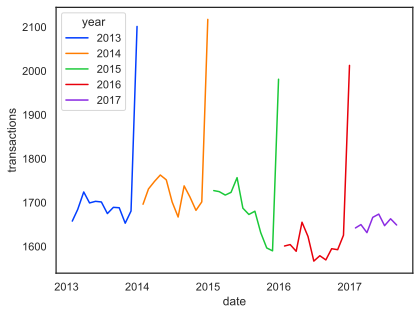

In [639]:

fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data = t, x = 'date', y = 'transactions', hue = 'year', palette = palette)
sns.set_style("whitegrid")

import mpld3
with open('test.html', 'w') as f:
    f.write(mpld3.fig_to_html(fig))


In [623]:
t['pct_change'] = t.transactions.pct_change()
t['pct_change'] = t['pct_change'].fillna(0)

/var/folders/5r/60f9npy54bz3_gzp5pkztxzw0000gn/T/ipykernel_49092/805571077.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data = t, x = 'date', y='pct_change', hue = 'year', palette = palette)


<AxesSubplot: xlabel='date', ylabel='pct_change'>

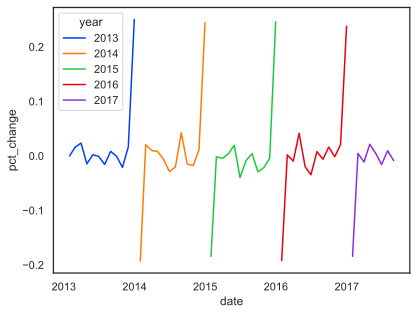

In [624]:
sns.lineplot(data = t, x = 'date', y='pct_change', hue = 'year', palette = palette)

### Oil

In [625]:
oil = pd.read_csv('oil.csv', parse_dates = ['date'])

In [626]:
oil = oil.set_index('date').resample('M').dcoilwtico.mean().reset_index()
oil['year'] = oil.date.dt.year

<AxesSubplot: xlabel='date', ylabel='dcoilwtico'>

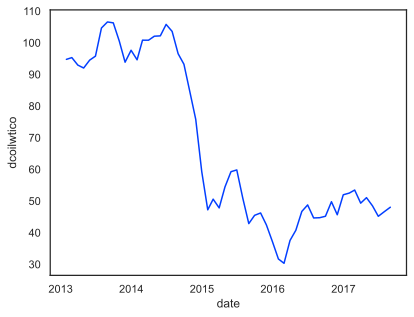

In [627]:
sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')

In [628]:
oil['pct_change'] = oil.dcoilwtico.pct_change()
oil['pct_change'] = oil['pct_change'].fillna(0)

<AxesSubplot: xlabel='date', ylabel='pct_change'>

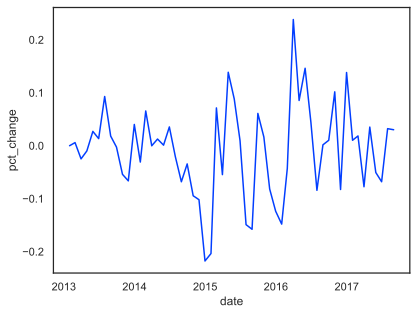

In [629]:
sns.lineplot(data = oil, x = 'date', y = 'pct_change')
# parece no tener seasonality a diff de la otra

/var/folders/5r/60f9npy54bz3_gzp5pkztxzw0000gn/T/ipykernel_49092/2782227066.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = oil, x = 'date', y = 'pct_change', palette = palette)


<AxesSubplot: xlabel='date', ylabel='pct_change'>

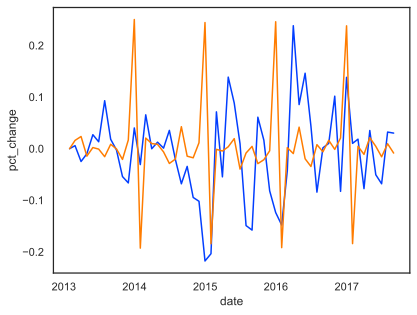

In [630]:
import matplotlib.pyplot as plt
sns.lineplot(data = oil, x = 'date', y = 'pct_change', palette = palette)
sns.lineplot(data = t, x = 'date', y='pct_change')

In [631]:
d = t[['date', 'transactions']]
o = oil[['date', 'dcoilwtico']]

In [632]:
j = pd.merge(d, o, right_on = 'date', left_on = 'date')
j.corr()

/var/folders/5r/60f9npy54bz3_gzp5pkztxzw0000gn/T/ipykernel_49092/1442697621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  j.corr()


,transactions,dcoilwtico
transactions,1.000000,0.229317
dcoilwtico,0.229317,1.000000


no tienen relacion aparente

### sales

In [633]:
sales = pd.read_csv('train.csv', parse_dates = ['date'])

In [634]:
sales = sales.groupby(['date', 'store_nbr']).sales.sum().reset_index()
sales['year'] = sales.date.dt.year

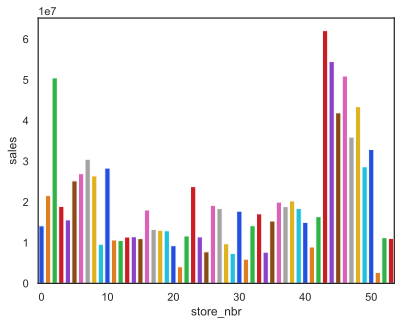

In [635]:
all = sales.groupby(['store_nbr']).sales.sum().reset_index()
sns.barplot(data = all, x = 'store_nbr', y = 'sales', palette = palette)
plt.xscale('linear')

In [636]:
sales = sales.groupby(['store_nbr', 'year']).sales.sum().reset_index()
#sales = sales.set_index('date').resample('M').sales.mean().reset_index()

In [637]:
def init():
    ax = sns.barplot(data = sales[sales['year'] == 2013], x = 'store_nbr', y = 'sales', palette = palette)
    plt.xscale('linear')
    return ax

def animate(i):
    years = [2013, 2014, 2015, 2016, 2017]
    ax = sns.barplot(data = sales[sales['year'] == years[i]], x = 'store_nbr', y = 'sales', palette = palette)
    plt.xscale('linear')
    return ax

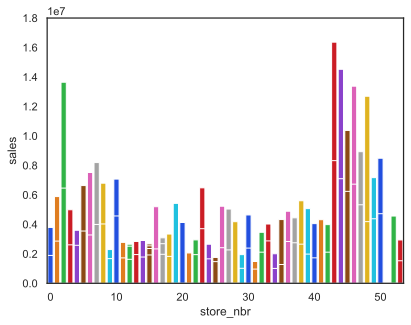

In [638]:
fig = plt.figure()
ax = fig.add_subplot()
import matplotlib.animation
ax.set_ylim(0, 1.8e7)
anim = matplotlib.animation.FuncAnimation(
    fig, animate, init_func = init,
    frames = 4,
)
with open('anim.js', 'w') as f:
    f.write(anim.to_jshtml())